<a href="https://colab.research.google.com/github/someDeveloperDH/game/blob/main/RSP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [8]:
#데이터 불러오기 : 필요시 경로 수정 필수
train_paper = os.listdir("/content/drive/MyDrive/proj_rsp/RPS/train/paper") #650개
train_rock = os.listdir("/content/drive/MyDrive/proj_rsp/RPS/train/rock")
train_scissors = os.listdir("/content/drive/MyDrive/proj_rsp/RPS/train/scissors")

test_paper = os.listdir("/content/drive/MyDrive/proj_rsp/RPS/test/paper") #90개
test_rock = os.listdir("/content/drive/MyDrive/proj_rsp/RPS/test/rock")
test_scissors = os.listdir("/content/drive/MyDrive/proj_rsp/RPS/test/scissors")

In [ ]:
#클래스 이름
class_name = ['paper', 'rock', 'scissors']


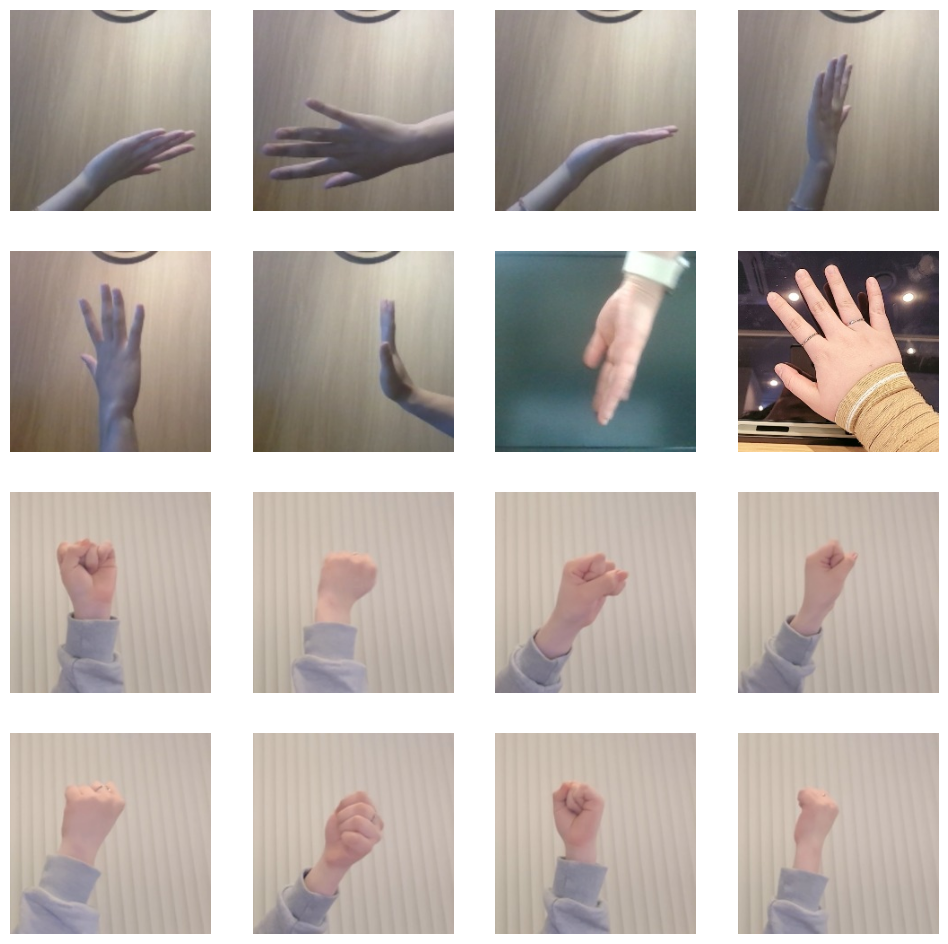

In [28]:
#여기서 부터는 <확인용>
nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_p_pix = [os.path.join("/content/drive/MyDrive/proj_rsp/RPS/train/paper", fname) for fname in train_paper[pic_index-8:pic_index]]
next_r_pix = [os.path.join("/content/drive/MyDrive/proj_rsp/RPS/train/rock", fname) for fname in train_rock[pic_index-8:pic_index]]

for i, img_path in enumerate(next_p_pix+next_r_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [27]:
#<확인용>
fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train) ,(x_test, y_test) = fashion.load_data()
fashion.load_data

<function keras.src.datasets.fashion_mnist.load_data()>